In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%matplotlib notebook
import sklearn
import skimage
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

import os
from skimage.transform import resize
import pylab

import pydicom as pyd

from scipy import ndimage, misc

import cv2


In [2]:
def dcmchange(orig,clahe) :
    r,c = orig.shape
    new = np.empty((r,c,3), dtype=orig.dtype)
#     new[:,:,:] = orig[:,:,np.newaxis]
    new[:,:,0] = orig[:,:]
    new[:,:,1] = clahe[:,:]
    new[:,:,2] = clahe[:,:]
    return new

In [3]:
# Feature
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

In [4]:
p = Path("dataset/")
dirs = p.glob("*")
labels_dict = {'CA lung':0, 'Extra':1, 'Heart':2,
               'Intra': 3, 'No Finding': 4, 'TB': 5, 'Pneumonia' : 6}
count = 0

heart_images = []
normal_images = []
heart_labels = []
normal_labels = []

count_normal = 0
count_heart = 0
# print("1111")
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]
#     print("1111")
#     print(folder_dir)
    if label == 'Heart' or label == 'No Finding' :
        for img_path in folder_dir.glob("*.dcm"):
#             print(img_path)
#             pic = pyd.read_file(os.path.normpath(img_path))
            target = "./" + str(img_path)

            pic = pyd.read_file(target)
            pic_r = np.array(pic.pixel_array)
            %matplotlib inline 
    #         preprocessing
            clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
            pic_r1 = clahe.apply(pic_r)
    #         preprocessing
            IMG_PX_SIZE = 224
            resized_img1 = resize(pic_r, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            resized_clahe = resize(pic_r1, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            #change pic to (224,224,3)
            resized_img2 = dcmchange(resized_img1,resized_clahe)
            resized_img = exposure.equalize_adapthist(resized_img2, clip_limit=0.03)
    #         resized_img = resized_img.flatten()

            if label == 'Heart' :
                heart_images.append(resized_img)
                heart_labels.append(labels_dict[label])
    #             heart_images.append(ndimage.rotate(resized_img2, 1, reshape=False))
                count_heart+=1
            elif label == 'No Finding' :
                normal_images.append(resized_img)
                normal_labels.append(labels_dict[label])
                count_normal+=1

            if count_normal == 5 or count_heart == 5 : 
                break

        count_normal = 0
        count_heart = 0


In [5]:
normal_labels = np.array(normal_labels)
normal_images = np.array(normal_images, dtype=np.float32)
heart_labels = np.array(heart_labels)
heart_images = np.array(heart_images, dtype=np.float32)

In [6]:
print("number of sample No Finding: {}".format(len(normal_images)))
print("number of sample Heart: {}".format(len(heart_images)))

number of sample No Finding: 5
number of sample Heart: 5


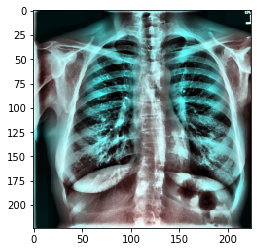

In [7]:
plt.imshow(normal_images[0])

In [8]:
image = normal_images[0]

In [9]:
image2 = cv2.flip(image,1)

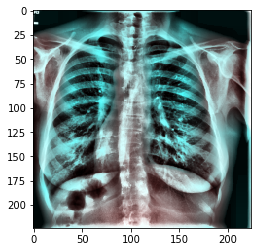

In [10]:
plt.imshow(image2)

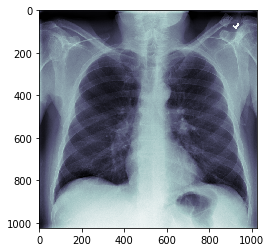

In [11]:
pic = pyd.read_file('dataset/No Findings/No Finding (84).dcm')
pylab.imshow(pic.pixel_array, cmap=pylab.cm.bone)

In [12]:
def dcmchange(orig,clahe,equal) :
    r,c = orig.shape
    new = np.empty((r,c,3), dtype=orig.dtype)
#     new[:,:,:] = orig[:,:,np.newaxis]
    new[:,:,0] = orig[:,:]
    new[:,:,1] = clahe[:,:]
    new[:,:,2] = equal[:,:]
    return new

In [13]:
# Feature
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

In [14]:
p = Path("./dataset/")
dirs = p.glob("*")
labels_dict = {'feature':0 }
count = 0
normal_images = []
normal_labels = []

count_normal = 0

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]
#     print(label)
#     print(folder_dir)
    if label == 'feature':
        for img_path in folder_dir.glob("*.dcm"):
#             print(img_path)
#             pic = pyd.read_file(os.path.normpath(img_path))
            target = "./" + str(img_path)

            pic = pyd.read_file(target)
            pic_r = np.array(pic.pixel_array)
            %matplotlib inline 
    #         preprocessing
            clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
            pic_r1 = clahe.apply(pic_r)
    #         preprocessing
            IMG_PX_SIZE = 224
            resized_img1 = resize(pic_r, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            resized_clahe = resize(pic_r1, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
            resized_equal = exposure.equalize_adapthist(resized_img1, clip_limit=0.03)
            #change pic to (224,224,3)
            resized_img2 = dcmchange(resized_img1,resized_clahe,resized_equal)
            resized_img = exposure.equalize_adapthist(resized_img2, clip_limit=0.03)
    #         resized_img = resized_img.flatten()

            if label == 'feature' :
                normal_images.append(resized_img)
                normal_labels.append(labels_dict[label])
                count_normal+=1

            if count_normal == 1: 
                break

        count_normal = 0
        count_heart = 0


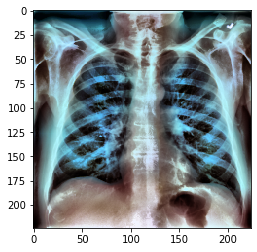

In [15]:
plt.imshow(normal_images[0])

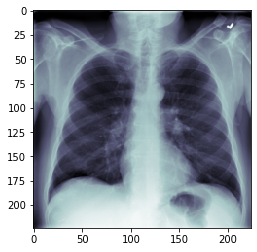

In [16]:
plt.imshow(resized_img1, cmap=pylab.cm.bone)

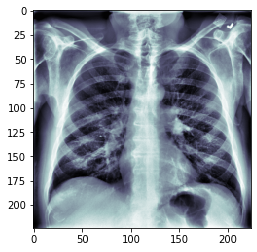

In [17]:
plt.imshow(resized_clahe, cmap=pylab.cm.bone)

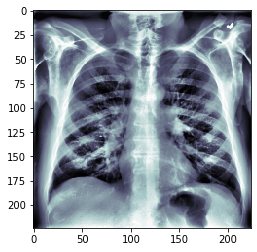

In [18]:
plt.imshow(resized_equal, cmap=pylab.cm.bone)

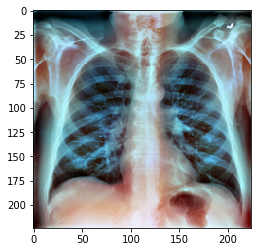

In [19]:
plt.imshow(resized_img2, cmap=pylab.cm.bone)

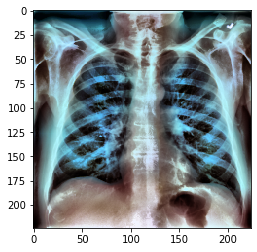

In [20]:
plt.imshow(resized_img, cmap=pylab.cm.bone)

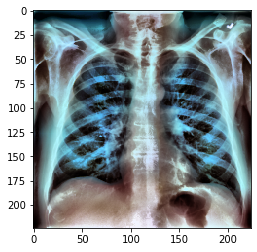

In [21]:
plt.imshow(normal_images[0])

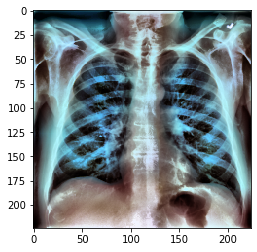

In [22]:
plt.imshow(resized_img, cmap=pylab.cm.bone)

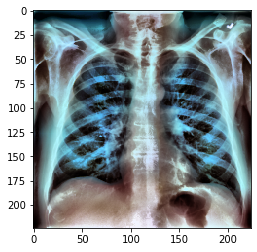

In [26]:
plt.imshow(normal_images[0])

In [24]:
image2 = cv2.flip(normal_images[0],1)

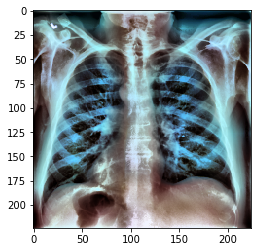

In [25]:
plt.imshow(image2)

In [ ]:
from scipy import ndimage
def incre(data,labels):
    new_data = []
    new_label = []
    for i in range(data.shape[0]):
        new_data.append(data[i].flatten())
        flip = cv2.flip(data[i],1)
        new_data.append(flip.flatten())
        new_data.append((ndimage.rotate(data[i], 5, reshape=False)).flatten())
        new_data.append((ndimage.rotate(data[i], -5, reshape=False)).flatten())
#         new_data.append((ndimage.rotate(flip,5,reshape=False)).flatten())
        new_label.append(labels[i])
        new_label.append(labels[i])
        new_label.append(labels[i])
        new_label.append(labels[i])
#         new_label.append(labels[i])
    new_data = np.array(new_data)
    new_label = np.array(new_label)
    return new_data,new_label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


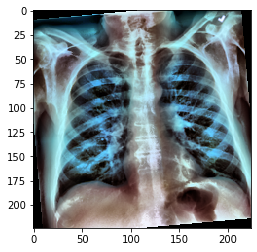

In [28]:
from scipy import ndimage
image3 = ndimage.rotate(normal_images[0], 5, reshape=False)
plt.imshow(image3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


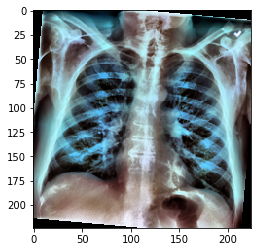

In [29]:
image3 = ndimage.rotate(normal_images[0], -5, reshape=False)
plt.imshow(image3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


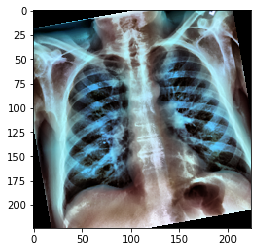

In [30]:
image3 = ndimage.rotate(normal_images[0], 10, reshape=False)
plt.imshow(image3)

In [1]:
import cv2
img=cv2.imread('dataset/TB_PNGs/TB_4.png')

In [2]:
img

array([[[  9,   9,   9],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [  8,   8,   8],
        [  9,   9,   9],
        [  5,   5,   5]],

       [[ 19,  19,  19],
        [ 32,  32,  32],
        [ 30,  30,  30],
        ...,
        [ 14,  14,  14],
        [ 16,  16,  16],
        [ 10,  10,  10]],

       [[ 18,  18,  18],
        [ 31,  31,  31],
        [ 28,  28,  28],
        ...,
        [ 13,  13,  13],
        [ 15,  15,  15],
        [  9,   9,   9]],

       ...,

       [[145, 145, 145],
        [255, 255, 255],
        [249, 249, 249],
        ...,
        [247, 247, 247],
        [255, 255, 255],
        [144, 144, 144]],

       [[ 70,  70,  70],
        [123, 123, 123],
        [119, 119, 119],
        ...,
        [119, 119, 119],
        [123, 123, 123],
        [ 68,  68,  68]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [3]:
image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
image

array([[  9,  16,  15, ...,   8,   9,   5],
       [ 19,  32,  30, ...,  14,  16,  10],
       [ 18,  31,  28, ...,  13,  15,   9],
       ...,
       [145, 255, 249, ..., 247, 255, 144],
       [ 70, 123, 119, ..., 119, 123,  68],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [6]:
def dcmchange(orig,clahe,equal) :
    r,c = orig.shape
    new = np.empty((r,c,3), dtype=orig.dtype)
#     new[:,:,:] = orig[:,:,np.newaxis]
    new[:,:,0] = orig[:,:]
    new[:,:,1] = clahe[:,:]
    new[:,:,2] = equal[:,:]
    return new

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from PIL import Image,ImageFilter
from skimage.filters import unsharp_mask
from skimage.transform import resize

In [10]:
pic_r=image
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
pic_r1 = clahe.apply(pic_r)
    #         preprocessing
IMG_PX_SIZE = 224
resized_img1 = resize(pic_r, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
resized_clahe = resize(pic_r1, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
#             image = img_as_float(resized_img1)
#             resized_hist2 = np.histogram(resized_img1, bins=2)
#             resized_hist = np.array(exposure.histogram(resized_img1 , nbins=224))
#             print(resized_hist)
resized_equal = exposure.equalize_adapthist(resized_img1, clip_limit=0.03)
            #change pic to (224,224,3)
resized_img2 = dcmchange(resized_img1,resized_clahe,resized_equal)
#             resized_img = unsharp_mask(resized_img2, radius=1, amount=2)
resized_img = exposure.equalize_adapthist(resized_img2, clip_limit=0.03)

In [11]:
resized_img

array([[[0.09986881, 0.22619095, 0.29286501],
        [0.09513852, 0.22043519, 0.27622078],
        [0.09513852, 0.21745948, 0.27622078],
        ...,
        [0.11406779, 0.34016644, 0.31738001],
        [0.16167834, 0.5115041 , 0.50677832],
        [0.1577603 , 0.52757501, 0.64318933]],

       [[0.08986402, 0.19574342, 0.25957655],
        [0.08532973, 0.18276507, 0.23271325],
        [0.08117737, 0.17168329, 0.21613022],
        ...,
        [0.11167885, 0.28817132, 0.31073308],
        [0.12144971, 0.36953861, 0.33791931],
        [0.16212355, 0.5115041 , 0.50091421]],

       [[0.07694466, 0.15279424, 0.18161792],
        [0.07694466, 0.14568657, 0.18161792],
        [0.07205401, 0.13636753, 0.15983356],
        ...,
        [0.06990713, 0.17904785, 0.14704956],
        [0.0847623 , 0.23785338, 0.17829739],
        [0.12317954, 0.36953861, 0.34273236]],

       ...,

       [[0.68027169, 0.6152849 , 0.61290556],
        [0.77236568, 0.7313388 , 0.74045218],
        [0.78900991, 0

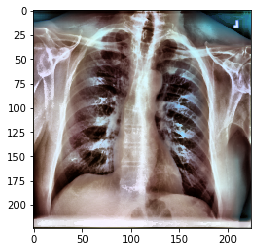

In [12]:
plt.imshow(resized_img)